#### AI IN MARKETING ASSIGNMENT 1 

#### Uploading nessasary libraries 

In [26]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from datetime import datetime

In [2]:
pip install xgboost

#### Load the excel file from the webscrappping 

In [4]:
df = pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\Outputdata.csv")
df.head()

,Date,Price,Likes,Dislikes,Followers
0,2019-01-01,$ 7488.23 CAD,9721,952,15734
1,2019-01-02,$ 7487.25 CAD,9723,954,15736
2,2019-01-03,$ 7486.27 CAD,9724,956,15738
3,2019-01-04,$ 7485.29 CAD,9725,957,15740
4,2019-01-05,$ 7484.31 CAD,9727,958,15741


#### Convert 'Price' column to numeric and Extract features from 'Date' column

In [11]:

df['Price'] = df['Price'].str.replace('[\$, CAD]', '', regex=True).astype(float)

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#### Drop the original 'Date' column

In [12]:

df.drop(columns=['Date'], inplace=True)

In [13]:
df

,Price,Likes,Dislikes,Followers,Year,Month,Day
0,7488.23,9721,952,15734,2019,1,1
1,7487.25,9723,954,15736,2019,1,2
2,7486.27,9724,956,15738,2019,1,3
3,7485.29,9725,957,15740,2019,1,4
4,7484.31,9727,958,15741,2019,1,5
...,...,...,...,...,...,...,...
1821,445593.99,13382,3708,19362,2023,12,27
1822,445593.42,13385,3709,19365,2023,12,28
1823,445592.85,13389,3711,19369,2023,12,29
1824,445592.28,13392,3712,19373,2023,12,30


#### Examining data

In [5]:


df.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,1826.0,11493.366375,1056.689984,9721.0,10599.50,11472.0,12334.00,13396.0
Dislikes,1826.0,2342.162103,799.232125,952.0,1645.50,2350.5,3033.75,3714.0
Followers,1826.0,17490.752464,1049.832204,15734.0,16596.25,17472.0,18341.25,19377.0


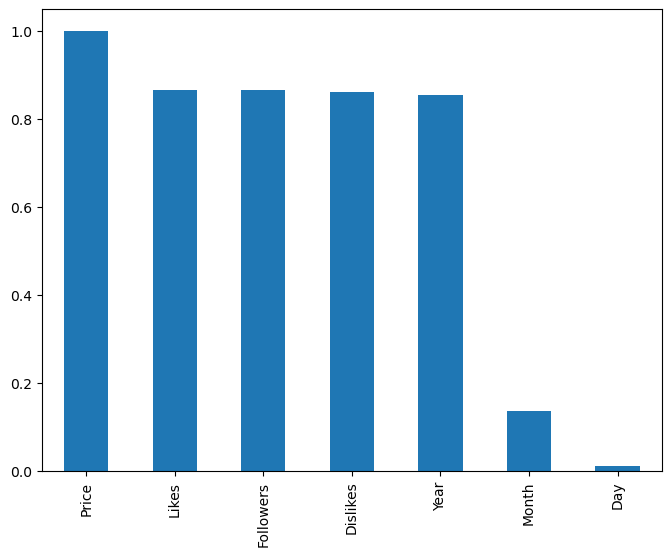

In [14]:
### Data Plot 

plt.figure(figsize=(8,6))
bars = df.corr()['Price'].sort_values(ascending=False).plot(kind='bar')

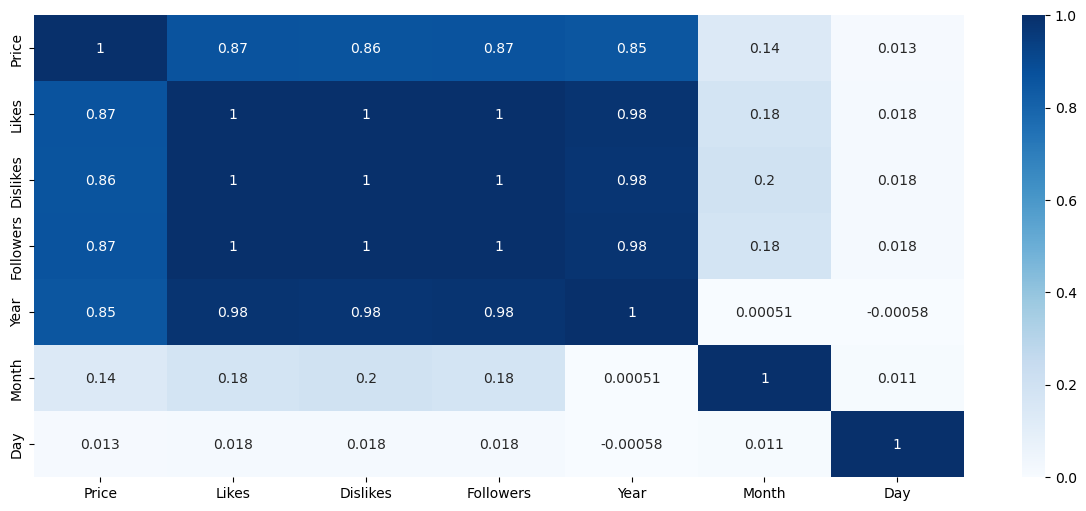

In [15]:
# Creating  a heatmap
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

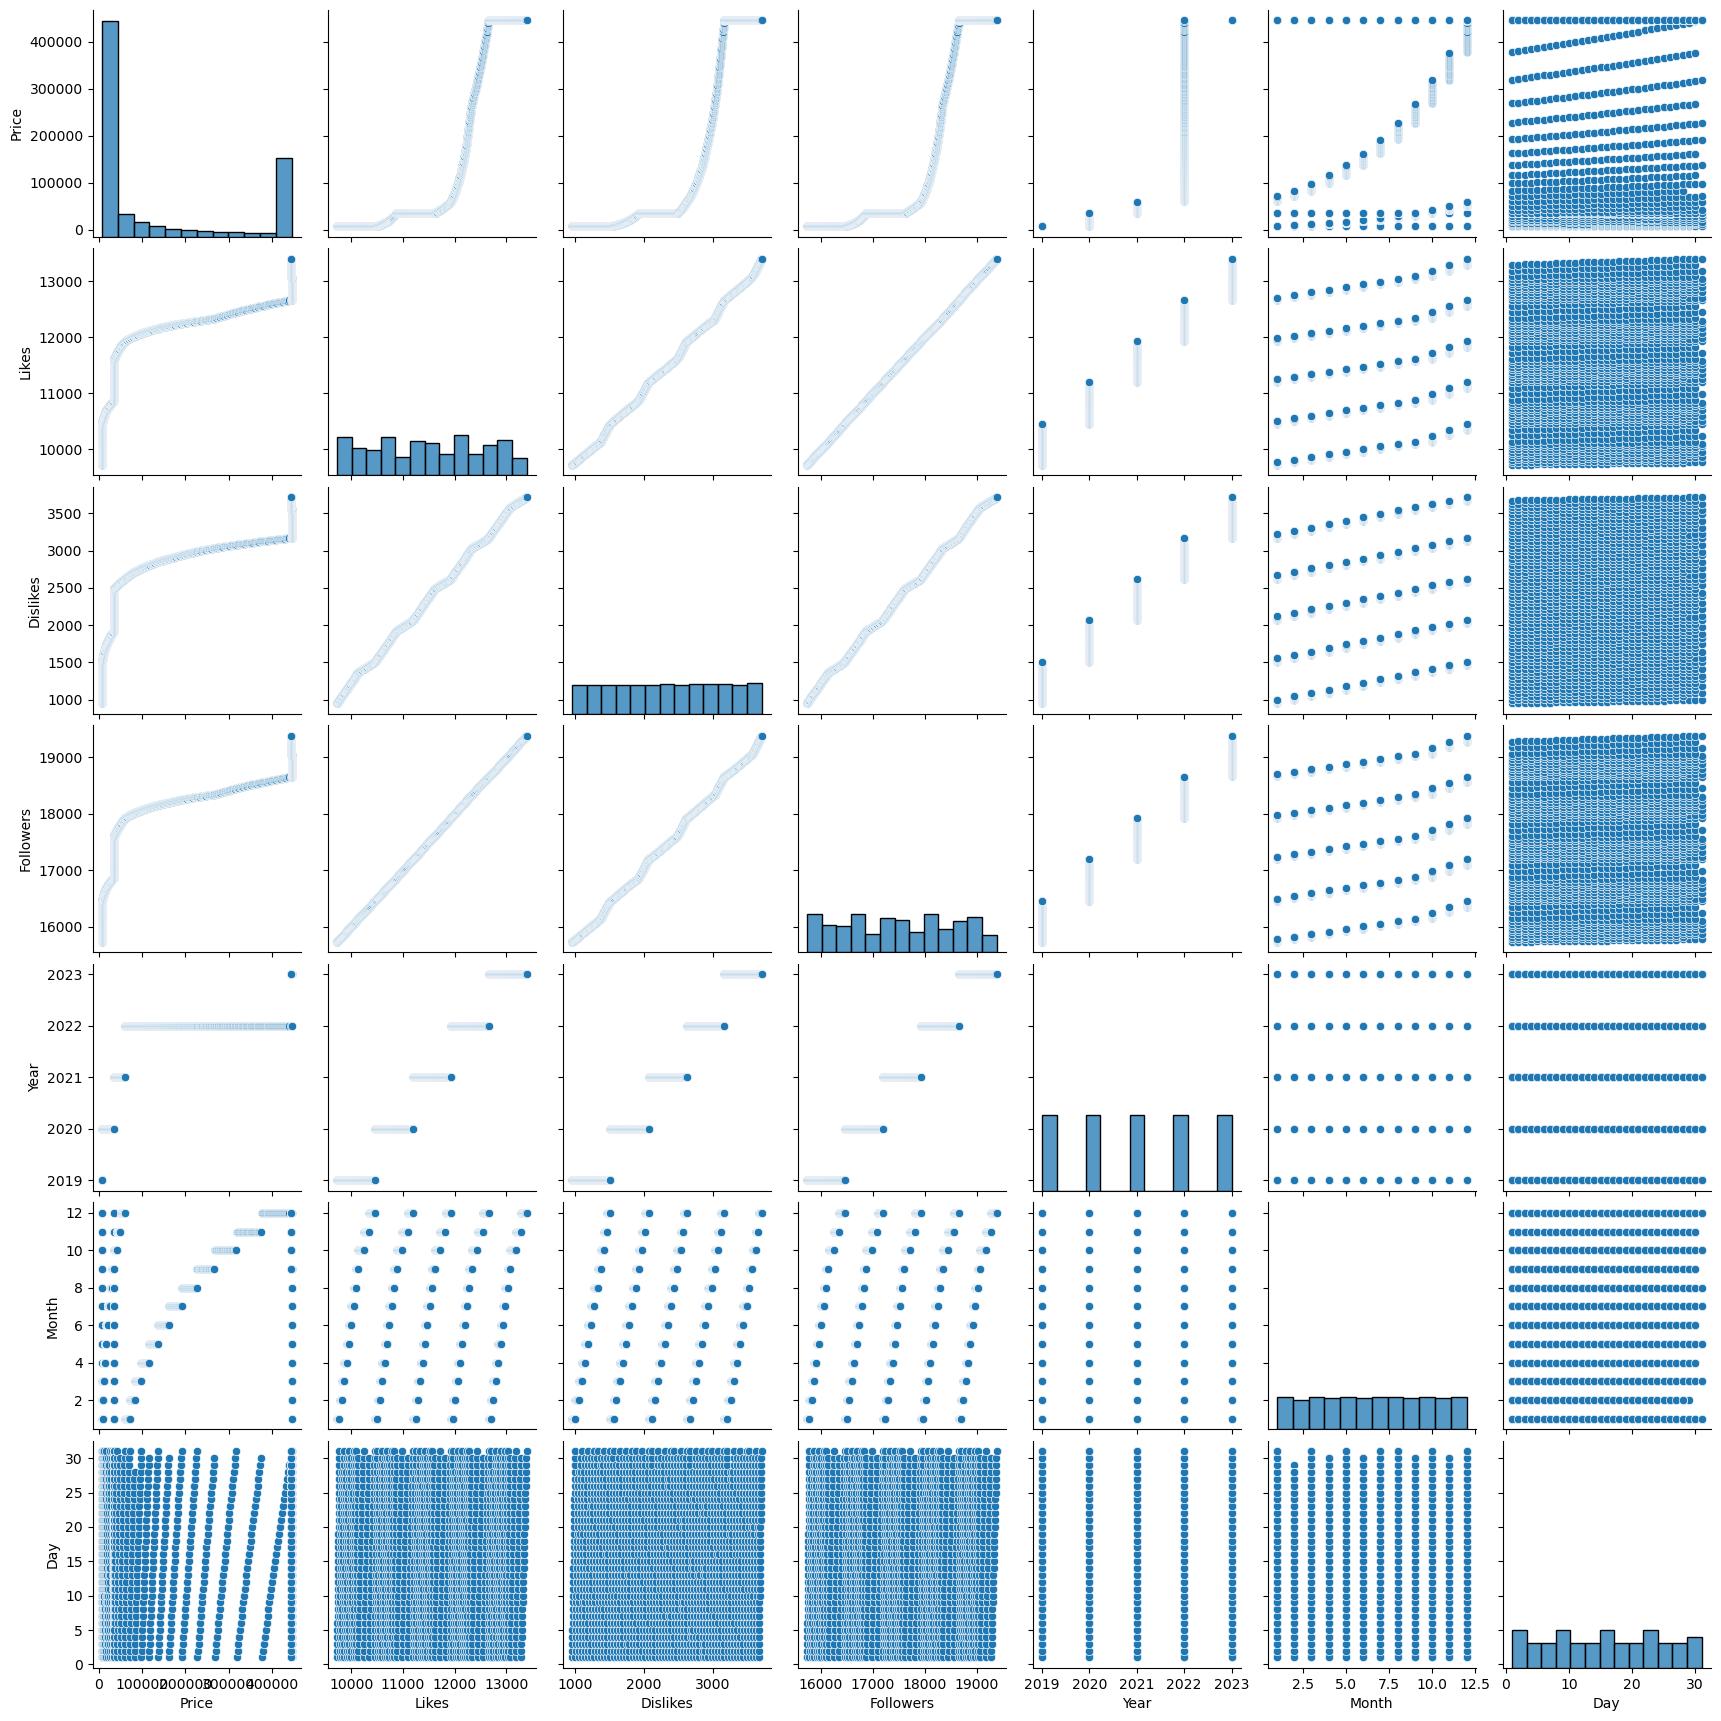

In [16]:
sns.pairplot(df)

In [17]:
# Create traning and testing datasets

x = df[['Day', 'Month', 'Year', 'Followers','Dislikes','Likes']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [41]:
# Identif the best model

regressors = {
    "XGBRegressor": XGBRegressor(silent=True),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(normalize=False),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(normalize=False),
}

In [40]:

# Initialize an empty DataFrame to store the results
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rsquare'])

for key in regressors:
    print('*', key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculating RMSE correctly using mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate R-squared using r2_score
    rsquare = r2_score(y_test, y_pred)

    # Perform k-fold cross-validation
    scores = cross_val_score(model, 
                             x_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {
        'model': key,
        'run_time': round((time.time() - start_time) / 60, 2),  # Convert seconds to minutes
        'rmse': rmse,  # RMSE on the test set
        'rsquare': rsquare,  # R-squared value
    }

    df_models = df_models.append(row, ignore_index=True)


* XGBRegressor


C:\Users\aravi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aravi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aravi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aravi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning:

* RandomForestRegressor


C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* DecisionTreeRegressor
* GaussianProcessRegressor


C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* SVR


C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* NuSVR


C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py:121: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_base.

* Ridge
* Lars
* TheilSenRegressor


C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  

* HuberRegressor


C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* PassiveAggressiveRegressor
* ARDRegression


C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\aravi\AppData\Local\Temp\ipykernel_17848\1108910881.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.795e+12, tolerance: 3.885e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not conver

* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py:121: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py:121: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py:121: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. P

In [34]:
#### model results

df_models.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse,rsquare
1,RandomForestRegressor,0.24,464.532987,0.999993
2,DecisionTreeRegressor,0.00,641.572119,0.999986
0,XGBRegressor,0.02,1151.199245,0.999954
7,Lars,0.00,56432.145792,0.890069
8,TheilSenRegressor,0.22,67135.457155,0.844414
6,Ridge,0.00,82283.366758,0.766283
11,ARDRegression,0.01,85826.526907,0.745722
9,HuberRegressor,0.01,85859.530063,0.745526
13,ElasticNet,0.00,85868.074485,0.745476
12,BayesianRidge,0.00,85869.112538,0.745469


In [35]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(x_test)

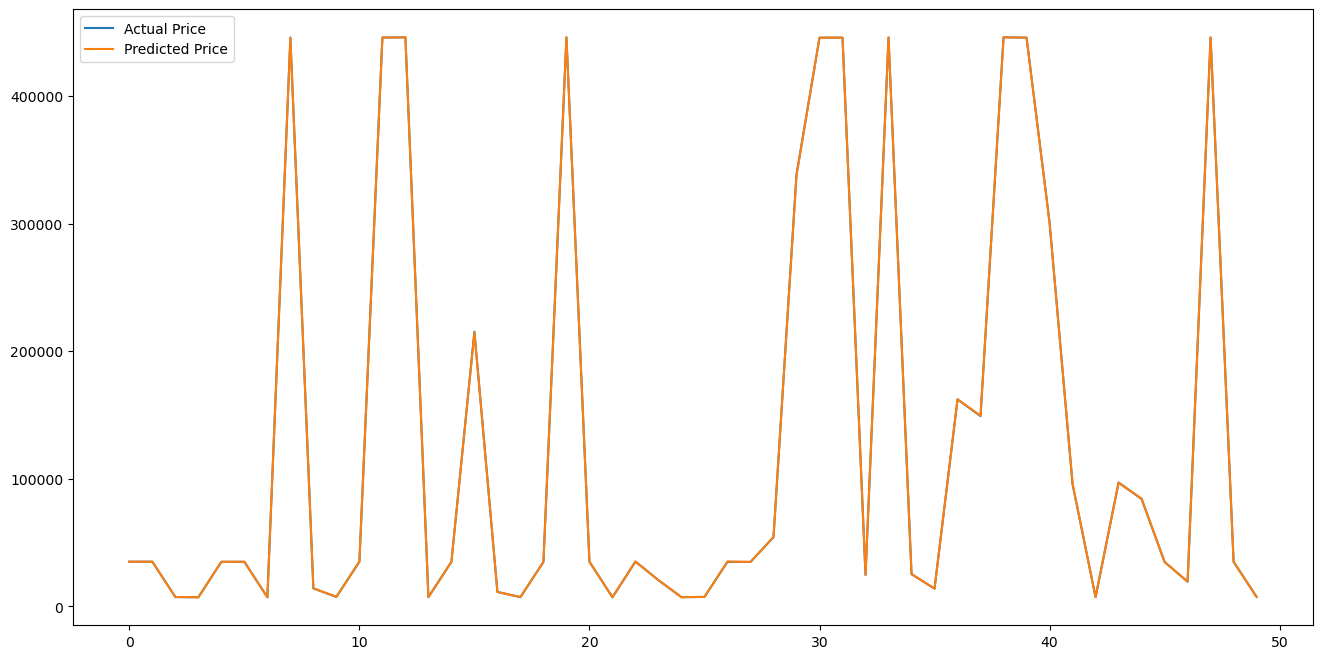

In [36]:
# Plot

test = pd.DataFrame({'Predicted Price':y_pred, 'Actual Price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual Price','Predicted Price'])

In [37]:
new_data = pd.DataFrame({
    'Day': [1],
    'Month': [1],
    'Year': [2024],
    'Followers': [15734],
    'Dislikes': [952], 
    'Likes': [9721]})
    
# Predict the price for January 1st, 2024
predicted_price = rf_regressor.predict(new_data)

In [38]:
predicted_price

array([7470.2341])